In [43]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, Wave

# Упражнение 9.2

В этом упражнениии зучается влияние diff и differentiate на сигнал. Создайте треугольный сигнал и напечатайте его. Примените diff к сигналу и напечатайте результат. Вычислите спектр треугольного сигнала, примените differentiate и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии diff и differentiate на этот сигнал?

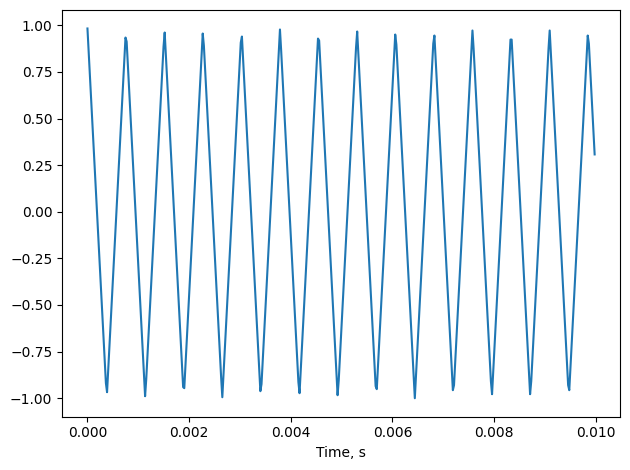

In [44]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=1320).make_wave(duration=0.01, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

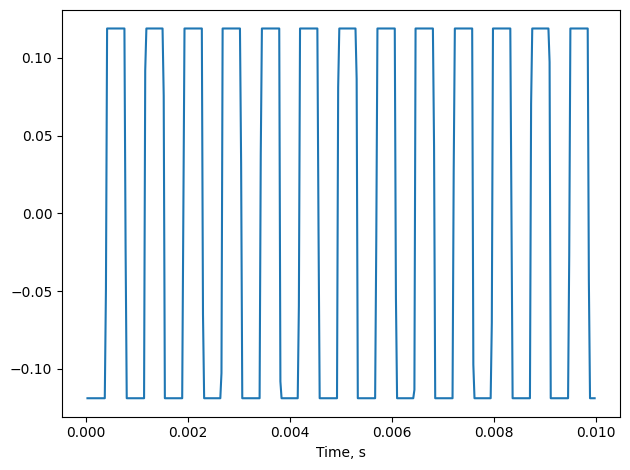

In [45]:
diff_wave = wave.diff()
diff_wave.plot()
decorate(xlabel='Time, s')

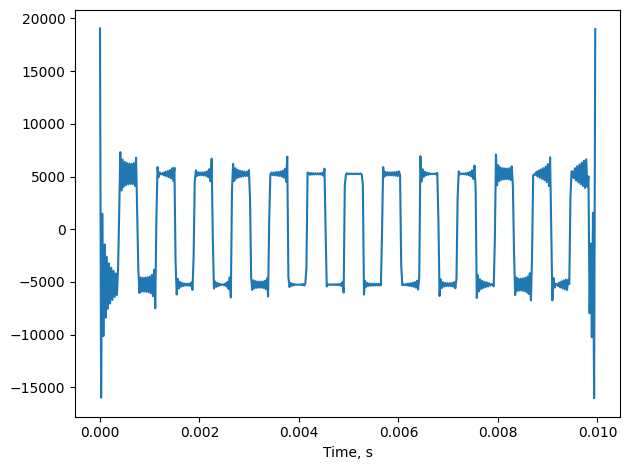

In [46]:
differentiate_wave = wave.make_spectrum().differentiate().make_wave()
differentiate_wave.plot()
decorate(xlabel='Time, s')

Когда мы берём спектральную производную мы получаем приближения в участках, где у прямоугольного сигнала происходят разрыва. На основе формы треугольного сигнала можно было прежположить, что производная в этих точках не определена.

# Упражнение 9.3

В данном упражнении изучается влияние cumsum и integrate на сигнал. Создайте прямоугольный сигнал и напечатайте его. Примените cumsum и напечатайте результат. Вычислите спектр прямоугольного сигнала, примените integrate и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии cumsum и integrate на этот сигнал?

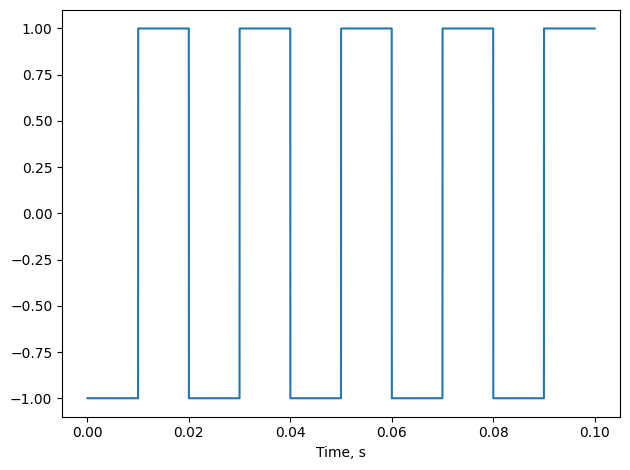

In [47]:
from thinkdsp import SquareSignal

wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

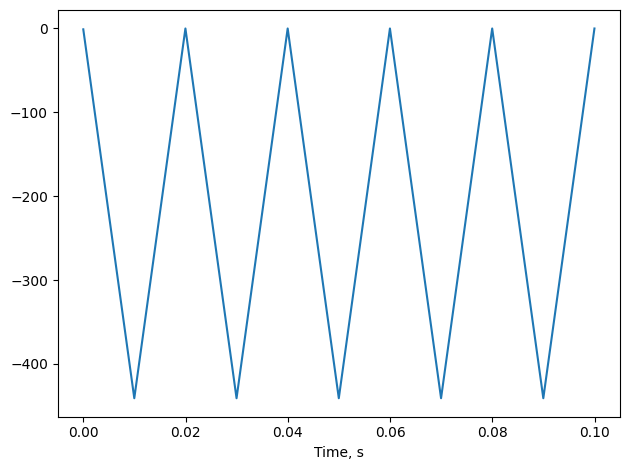

In [48]:
cumsum_wave = wave.cumsum()
cumsum_wave.plot()
decorate(xlabel='Time, s')

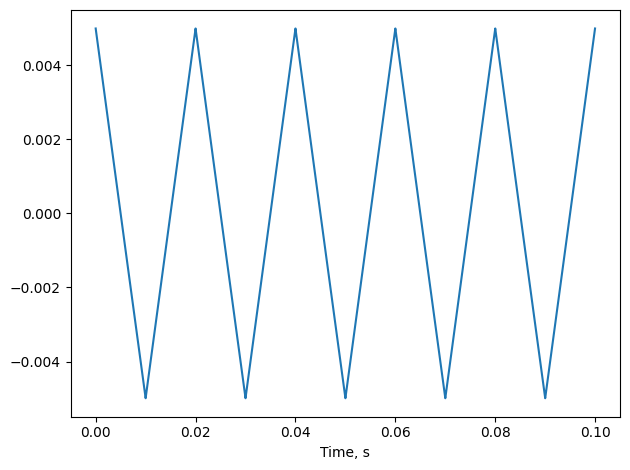

In [49]:
int_spec = wave.make_spectrum().integrate()
int_spec.hs[0] = 0
int_wave = int_spec.make_wave()
int_wave.plot()
decorate(xlabel='Time, s')

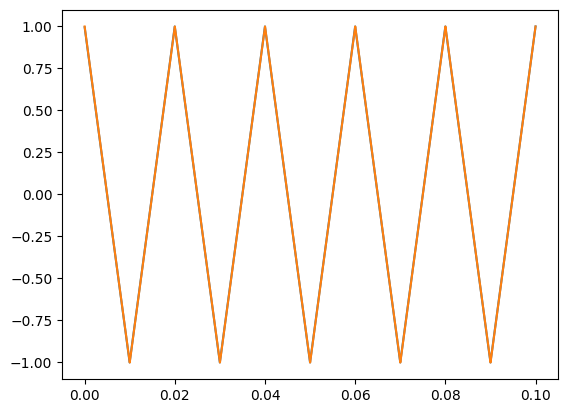

In [50]:
cumsum_wave.unbias()
cumsum_wave.normalize()
int_wave.normalize()
cumsum_wave.plot()
int_wave.plot()

In [51]:
cumsum_wave.max_diff(int_wave)

0.0045351473922902175

Результаты очень похожи по форме, но отличаются по амплитуде. Но даже с учётом нормализации можно увидеть, что результаты не совпадают полностью.

# Упражнение 9.4
В данном упражнении изучается влияние двойного интегрирования. Создайте пилообразный сигнал, вычислите его спектр, а затем дважды примените integrate. Напечатайте результирующий сигнали его спектр. Какова математическая форма сигнала? Почему он напоминает синусоиду?

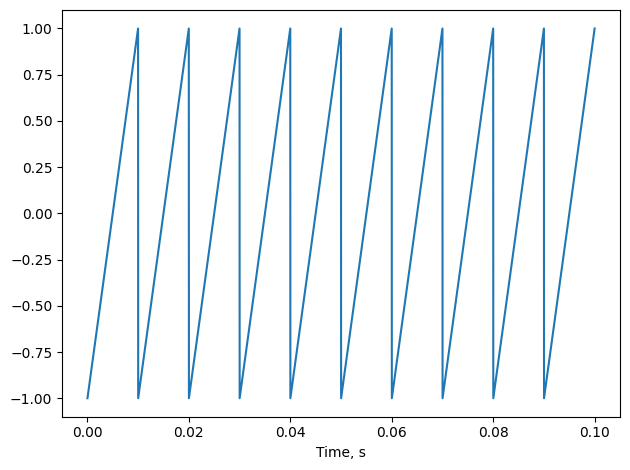

In [52]:
from thinkdsp import SawtoothSignal

wave = SawtoothSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

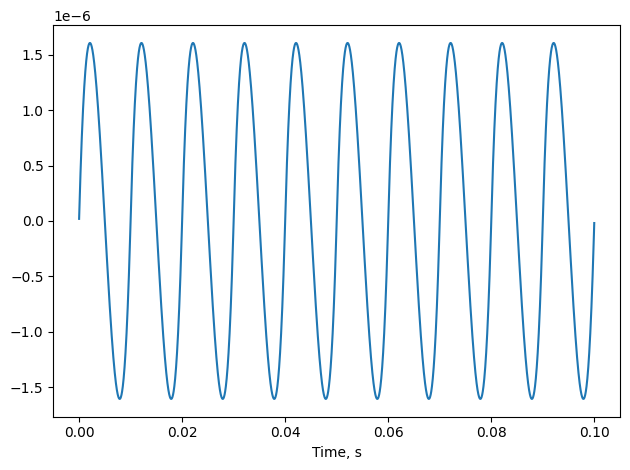

In [53]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0

wave1 = spectrum.make_wave()
wave1.plot()
decorate(xlabel='Time, s')

Результатом двойного интегрирования стала кубическая кривая. ФОрма напоминаетт синусоиду из-за того, что интегрирование приводит к результатам, похожим на low_pass фильтр. После двойного интегрирования удаляются почти все гармоники, кроме фундаментальной, из-за чего сигнал становится похожим на синусоиду.

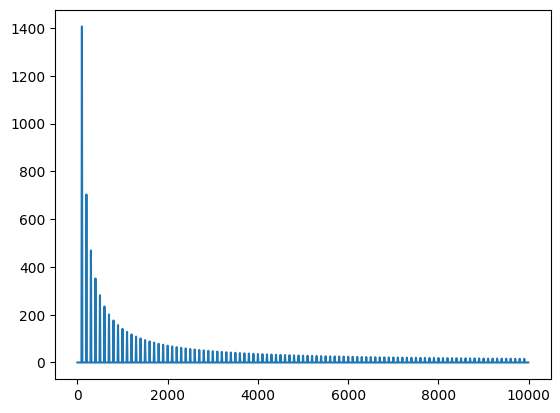

In [54]:
wave.make_spectrum().plot(high=10000)

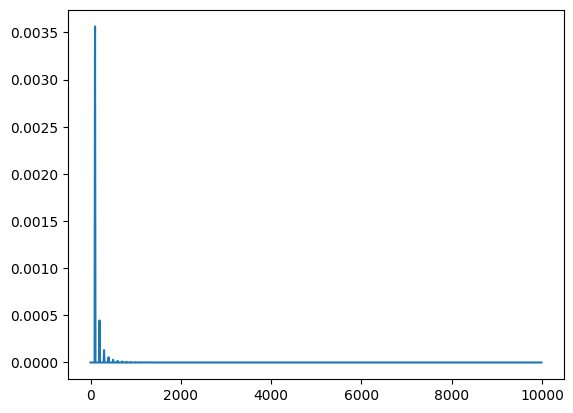

In [55]:
wave1.make_spectrum().plot(high=10000)

# Упражнение 9.5

В этом упражнении изучается влияние второй разности и второй производной. Создайте CubicSignal, определенный в thinkdsp. Вычислите вторую разность, дважды применив diff. Как выглядит результат? Вычислите вторую производную, дважды применивdifferentiate к спектру. Похожи ли результаты?

Распечатайте фильтры, соответствующие второй разнице и второй производной, и сравните их. Подсказка: для того чтобы получить фильтры в одном масштабе, используйте сигнал с частотой кадров 1.

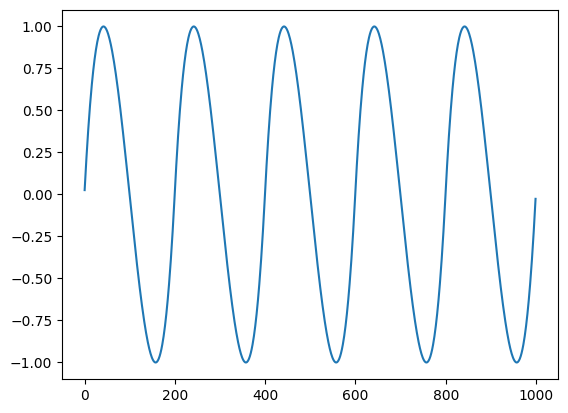

In [56]:
from thinkdsp import CubicSignal

wave = CubicSignal(freq=0.005).make_wave(duration=1000, framerate=1)
wave.plot()

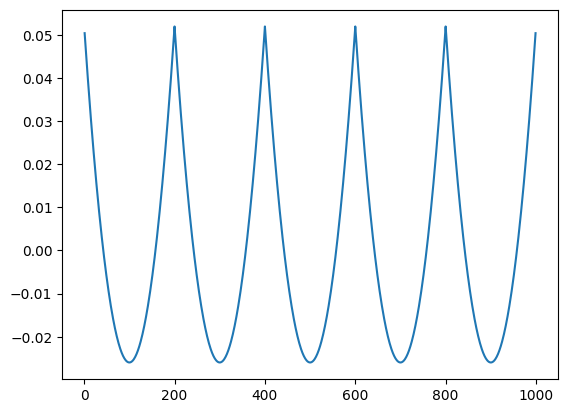

In [57]:
d1_wave = wave.diff()
d1_wave.plot()

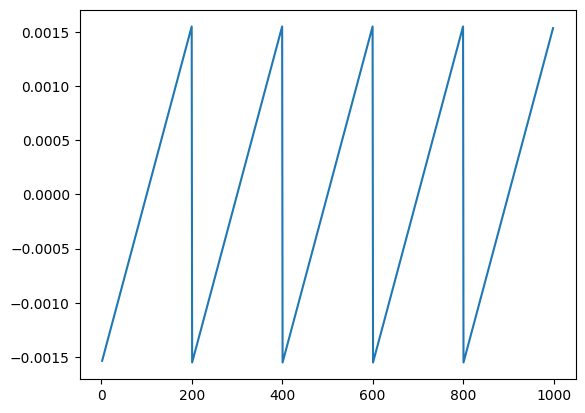

In [58]:
d2_wave = d1_wave.diff()
d2_wave.plot()

Первая разность представляет из себя параболу, а вторая – пилообразный сигнал.

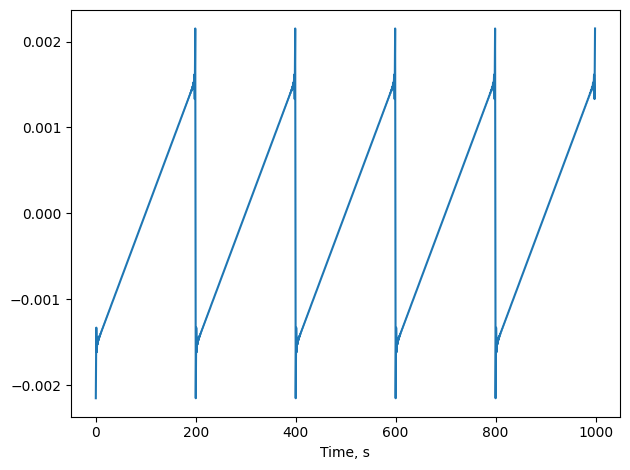

In [59]:
spectrum = wave.make_spectrum().differentiate().differentiate()
di_wave = spectrum.make_wave()
di_wave.plot()
decorate(xlabel='Time, s')

Как и в примере с треугольным сигналом, можно увидеть "звон", вызванный апроксимацией в местах разрыва производной параболического сигнала.

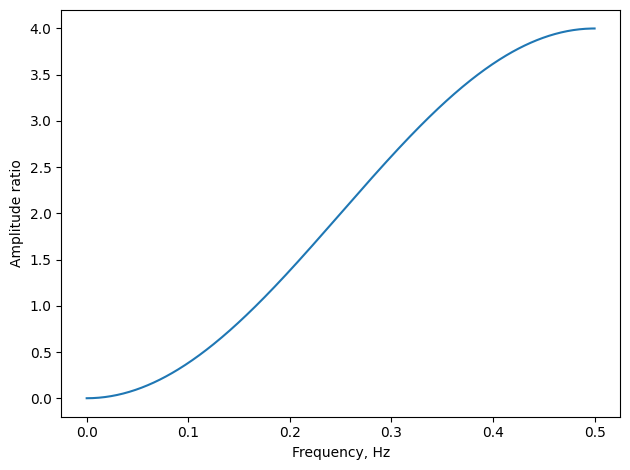

In [60]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

decorate(xlabel='Frequency, Hz',
                 ylabel='Amplitude ratio')

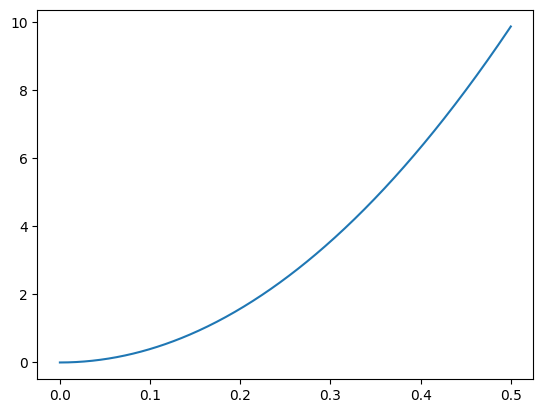

In [61]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs)**2
deriv_filter.plot()

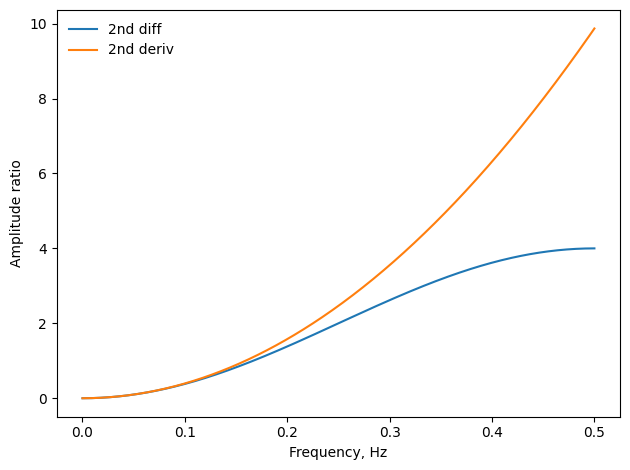

In [62]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency, Hz',
                 ylabel='Amplitude ratio')

Вторая производная представляет из себя high_pass фильтр параболической формы. Конечная разность является хорошей аппроксимацией только для низких частот, после чего они расходятся.